In [ ]:
#Importer les packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score, log_loss

dimensions de X: (2, 100)
dimensions de y: (1, 100)


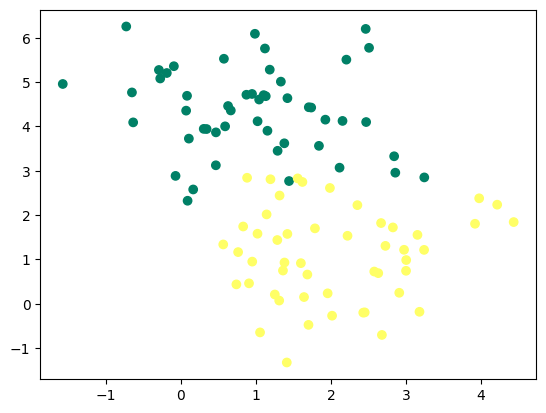

In [ ]:
# Prépartion des données
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))
print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)
plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
plt.show()

In [ ]:
# Initialisation des paramètres (poids et biais)
def initialisation(ni, nc, ns):
  W1 = np.random.randn(nc, ni)
  b1 = np.zeros((nc, 1))
  W2 = np.random.randn(ns, nc)
  b2 = np.zeros((ns, 1))
  parametres = {
      'W1': W1,
      'b1': b1,
      'W2': W2,
      'b2': b2
  }
  return parametres

In [ ]:
# Définir la fonction d'activation
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [ ]:
# fonction mise à jour des paramètres
def update(dW, db, W, b, learning_rate):
    W -= learning_rate * dW
    b -= learning_rate * db
    return (W, b)

In [ ]:
# fonction propagation vers l'avant
def propagation_avant(X, parametres):
  W1 = parametres['W1']
  b1 = parametres['b1']
  W2 = parametres['W2']
  b2 = parametres['b2']
  Z1 = W1.dot(X) + b1
  A1 = sigmoid(Z1)
  Z2 = W2.dot(A1) + b2
  A2 = sigmoid(Z2)
  activations = {
    'A1': A1,
    'A2': A2
  }
  return activations

In [ ]:
# fonction propagation vers l'arrière
def propagation_arriere(X, y, parametres, activations,learning_rate):
  A1 = activations['A1']
  A2 = activations['A2']
  W1 = parametres['W1']
  b1 = parametres['b1']
  W2 = parametres['W2']
  b2 = parametres['b2']
  m = y.shape[1]
  dZ2 = A2 - y
  dW2 = 1 / m * dZ2.dot(A1.T)
  db2 = 1 / m * np.sum(dZ2, axis=1, keepdims = True)
  dZ1 = np.dot(W2.T, dZ2) * A1 * (1 - A1)
  dW1 = 1 / m * dZ1.dot(X.T)
  db1 = 1 / m * np.sum(dZ1, axis=1, keepdims = True)

  W1, b1 = update(dW1, db1, W1, b1, learning_rate)
  W2, b2 = update(dW2, db2, W2, b2, learning_rate)
  parametres = {
      'W1': W1,
      'b1': b1,
      'W2': W2,
      'b2': b2
  }
  return parametres

In [ ]:
#fonction prédiction
def predict(X, parametres):
  activations = propagation_avant(X, parametres)
  A2 = activations['A2']
  return A2 >= 0.5

In [ ]:
# Entrainement
def réseau_de_neurons(X, y, n1,learning_rate, num_iterations):
  # initialisation des paramètres
  n0 = X.shape[0]
  n2 = y.shape[0]
  np.random.seed(0)
  parametres = initialisation(n0, n1, n2)

  train_loss = []
  train_acc = []
  history = []

  # descent de gradient
  for i in range(num_iterations):
    activations =propagation_avant(X, parametres)
    A2 = activations['A2']
    # Courbe d'apprentissage
    train_loss.append(log_loss(y.flatten(), A2.flatten()))
    y_pred = predict(X, parametres)
    train_acc.append(accuracy_score(y.flatten(), y_pred.flatten()))
    history.append([parametres.copy(), train_loss, train_acc, i])
    # mettre à jour les paramètres avec la fonction propagation vers l'arrière
    parametres = propagation_arriere(X, y, parametres, activations,learning_rate)
  #Tracer la courbe d'apprentissage
  plt.figure(figsize=(12, 4))
  plt.plot(train_loss, label='Erreurs d\'entrainement')
  plt.legend()
  plt.plot(train_acc, label='Accuracy d\'entrainement')
  plt.legend()
  plt.show()
  return parametres

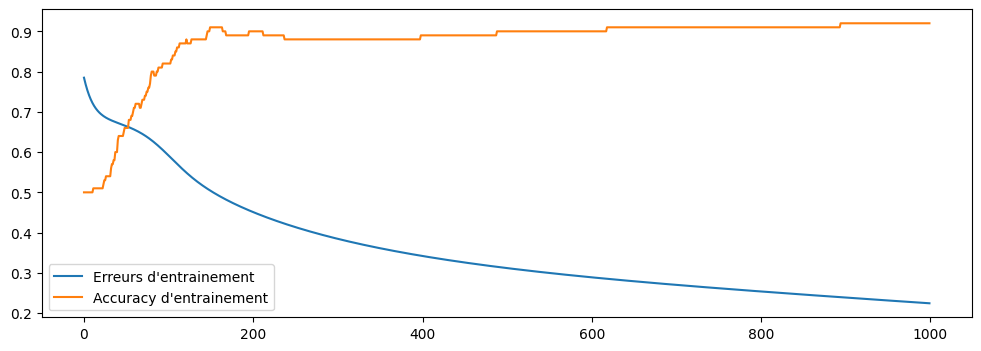

{'W1': array([[ 1.25454027, -1.56343601]]),
 'b1': array([[1.69833767]]),
 'W2': array([[5.08140255]]),
 'b2': array([[-2.11972532]])}

In [ ]:
#Inférence
réseau_de_neurons(X, y, n1=1,learning_rate=0.1, num_iterations=1000)